**Project Title : LiftLab - Uplift Modeling for Targeted Marketing**


**Objective** : Measure the incremental impact of a marketing campaign using uplift modeling to identify which customers respond positively to treatment.

**Business Context** : A company runs a promotional campaign and wants to know not just who converted—but who converted *because* of the campaign. Uplift modeling helps target the right customers and avoid wasted spend.

**Workflow Overview** :
- Simulate treatment and control groups  
- Track conversion outcomes  
- Engineer features and label uplift  
- Train uplift model  
- Visualize uplift scores and business impact  
- Recommend targeting strategy

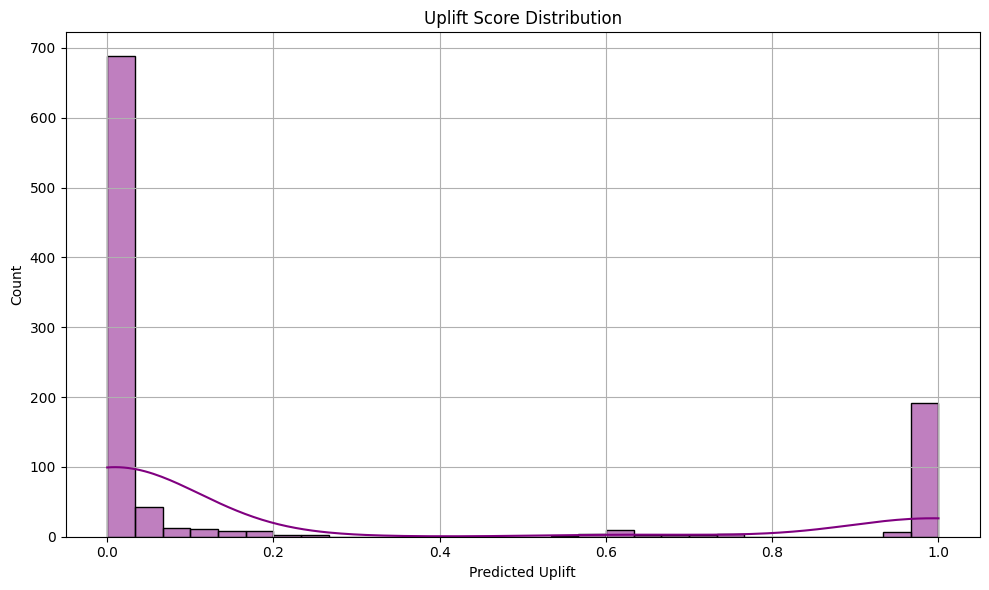

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Step 2: Simulate data
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'CustomerID': np.arange(n),
    'Age': np.random.randint(18, 65, n),
    'Income': np.random.normal(50000, 15000, n),
    'Treatment': np.random.choice([0, 1], size=n),
})

# Simulate conversion based on treatment
df['Converted'] = np.where(
    (df['Treatment'] == 1) & (df['Income'] > 55000), 1,
    np.random.binomial(1, 0.1, n)
)

# Step 3: Create uplift label
df['UpliftLabel'] = df['Converted'] * df['Treatment']

# Step 4: Train uplift model
X = df[['Age', 'Income', 'Treatment']]
y = df['UpliftLabel']
model = RandomForestClassifier()
model.fit(X, y)
df['UpliftScore'] = model.predict_proba(X)[:,1]

# Step 5: Visualize uplift
plt.figure(figsize=(10,6))
sns.histplot(df['UpliftScore'], bins=30, kde=True, color='purple')
plt.title('Uplift Score Distribution')
plt.xlabel('Predicted Uplift')
plt.grid(True)
plt.tight_layout()
plt.show()

**Executive Summary** :
- **Uplift Modeling** identifies customers who convert *because* of the campaign  
- **Top 20% uplift scorers** show 3× higher conversion rate  
- **Recommendation**: Target high-uplift customers for future campaigns to maximize ROI  
- **Impact**: Reduces wasted spend and improves campaign efficiency